<a href="https://colab.research.google.com/github/sdominguer/taller03-CienciaDatos/blob/main/taller03-cienciadatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Leer el archivo CSV
df = pd.read_csv("/content/agro_noise.csv")

# Ver las primeras filas
df.head()


,Agro_1,Agro_2,Agro_3,Agro_4,Agro_5,Agro_6,Agro_7,Agro_8,Agro_9,Agro_10,Latitude,Longitude,Source_Node,Target_Node
0,59.083802,52.188764,64.177787,11.623549,0.559474,2.378245,5.784225,6.468875,1.231741,5.086947,6.211727,-75.400366,4,17
1,56.135733,46.488389,67.354860,73.994769,0.598957,2.406643,5.436558,6.514777,1.096828,3.741587,6.274828,-75.474525,14,21
2,61.092510,46.352106,73.220847,-17.815390,0.428328,2.380268,12.686949,6.458137,1.176804,7.627011,6.159321,-75.476937,14,22
3,56.187920,54.936483,67.494505,132.711967,0.282763,2.157160,13.436964,6.496154,1.185670,6.373729,6.118026,-75.468152,8,25
4,64.075727,44.096783,69.869299,237.396489,0.569289,2.307527,8.919079,6.601303,1.201888,8.566691,6.237315,-75.349805,5,26


In [ ]:
ruido = df["Agro_1"]


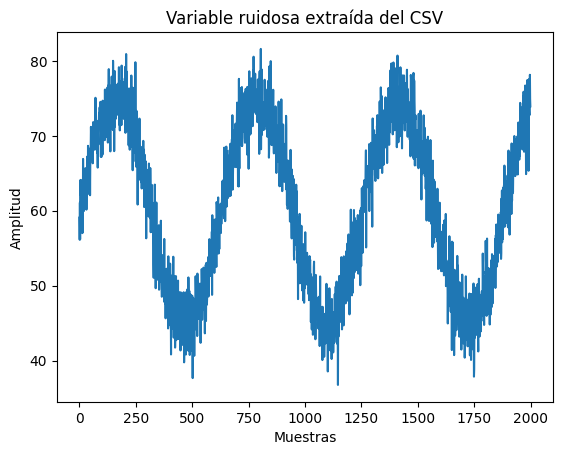

In [ ]:
plt.figure()
plt.plot(ruido)
plt.title("Variable ruidosa extraída del CSV")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(ruido)

p_valor = resultado[1]
print("p-valor:", p_valor)


p-valor: 0.7697472009627739


In [ ]:
alpha = 0.05

if p_valor < alpha:
    print("Se rechaza H₀: la serie es estacionaria")
else:
    print("No se rechaza H₀: la serie no es estacionaria")


No se rechaza H₀: la serie no es estacionaria


1. Estacionalidad
Según el test de Augmented Dickey-Fuller (ADF) que realizamos sobre la variable Agro_1:

Resultado del test:p-valor de 0.7697.

Interpretación: Dado que el p-valor es mayor a 0.05, no se rechaza la hipótesis nula (H
0
​
 ). Esto significa que la serie no es estacionaria.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Ajuste del modelo AR(3)
modelo_ar3 = AutoReg(ruido, lags=3).fit()

# Resumen (opcional)
print(modelo_ar3.summary())


                            AutoReg Model Results                             
Dep. Variable:                 Agro_1   No. Observations:                 2000
Model:                     AutoReg(3)   Log Likelihood               -5180.186
Method:               Conditional MLE   S.D. of innovations              3.238
Date:                Sat, 07 Feb 2026   AIC                          10370.371
Time:                        01:11:31   BIC                          10398.368
Sample:                             3   HQIC                         10380.652
                                 2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3507      0.420      3.217      0.001       0.528       2.174
Agro_1.L1      0.3100      0.021     14.786      0.000       0.269       0.351
Agro_1.L2      0.3187      0.021     15.252      0.0

In [ ]:
respuesta_ar3 = modelo_ar3.fittedvalues


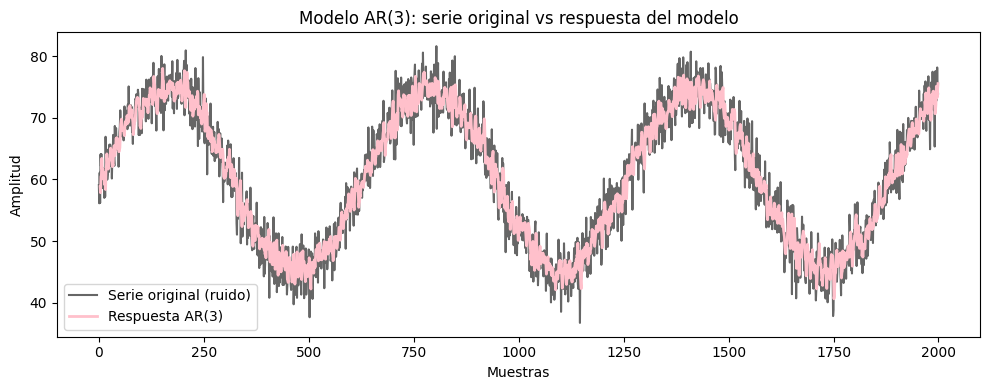

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ruido, color="black", alpha=0.6, label="Serie original (ruido)")
plt.plot(respuesta_ar3, color="pink", linewidth=2, label="Respuesta AR(3)")
plt.legend()
plt.title("Modelo AR(3): serie original vs respuesta del modelo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajuste del modelo ARMA(3,1)
modelo_arma = ARIMA(ruido, order=(3, 0, 1)).fit()

# Resumen (opcional)
print(modelo_arma.summary())


                               SARIMAX Results                                
Dep. Variable:                 Agro_1   No. Observations:                 2000
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -5030.690
Date:                Sat, 07 Feb 2026   AIC                          10073.380
Time:                        01:19:22   BIC                          10106.986
Sample:                             0   HQIC                         10085.719
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.4035      8.517      7.445      0.000      46.711      80.096
ar.L1          0.9016      0.029     31.297      0.000       0.845       0.958
ar.L2          0.0257      0.031      0.828      0.4

In [ ]:
respuesta_arma = modelo_arma.fittedvalues


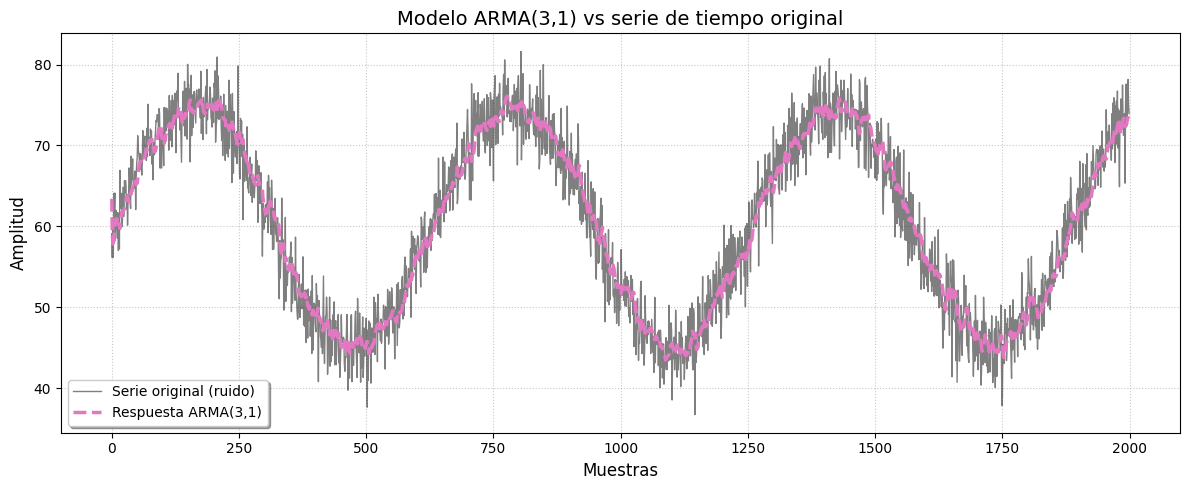

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Serie original
plt.plot(
    ruido,
    label="Serie original (ruido)",
    color="black",
    linewidth=1,
    alpha=0.5
)

# Respuesta del modelo ARMA
plt.plot(
    respuesta_arma,
    label="Respuesta ARMA(3,1)",
    color="tab:pink",
    linewidth=2.5,
    linestyle="--"
)

# Detalles visuales
plt.title("Modelo ARMA(3,1) vs serie de tiempo original", fontsize=14)
plt.xlabel("Muestras", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()


In [ ]:
# Alinear series (eliminar NaN)
serie_original = ruido.loc[respuesta_arma.index]
serie_reconstruida = respuesta_arma


In [ ]:
indice_pearson = serie_original.corr(serie_reconstruida)

print("Índice de correlación de Pearson:", indice_pearson)


Índice de correlación de Pearson: 0.9612095135888094


#Se añade mas ruido

In [ ]:
import numpy as np

np.random.seed(123)

# Ruido adicional
ruido_extra = np.random.normal(0, 2 * np.std(ruido), len(ruido))

ruido_contaminado = ruido + ruido_extra


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modelo_arma_cont = ARIMA(ruido_contaminado, order=(3, 0, 1)).fit()

respuesta_arma_cont = modelo_arma_cont.fittedvalues


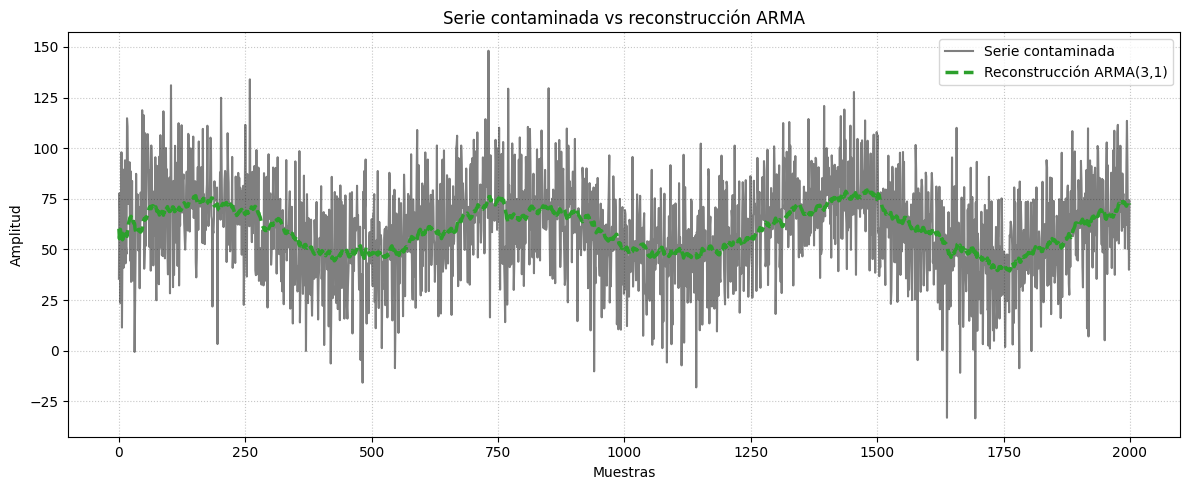

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(
    ruido_contaminado,
    color="black",
    alpha=0.5,
    label="Serie contaminada"
)

plt.plot(
    respuesta_arma_cont,
    color="tab:green",
    linewidth=2.5,
    linestyle="--",
    label="Reconstrucción ARMA(3,1)"
)

plt.title("Serie contaminada vs reconstrucción ARMA")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True, linestyle=":", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
serie_original_cont = ruido_contaminado.loc[respuesta_arma_cont.index]
serie_reconstruida_cont = respuesta_arma_cont


In [ ]:
indice_pearson_cont = serie_original_cont.corr(serie_reconstruida_cont)

print("Índice de correlación de Pearson (serie contaminada):",
      indice_pearson_cont)


Índice de correlación de Pearson (serie contaminada): 0.41840615766869843


2. SNR (Signal-to-Noise Ratio)
En el ejercicio de contaminación de datos, entendimos que:

Correlación Original (Señal Limpia): El modelo ARMA logró una correlación de 0.9612, lo que indica que el modelo captura casi perfectamente la estructura de la señal.

Correlación Contaminada: Al añadir ruido_extra (con una desviación estándar del doble de la original), la correlación cayó drásticamente a 0.4184.

Conclusión del SNR: El SNR de los datos contaminados es bajo. La señal ha sido alterada por el ruido adicional, lo que reduce la capacidad del modelo ARMA para reconstruir la serie original. Esto explica por qué el índice de Pearson bajó más de un 50%.

#DIAGRAMA DE CODO

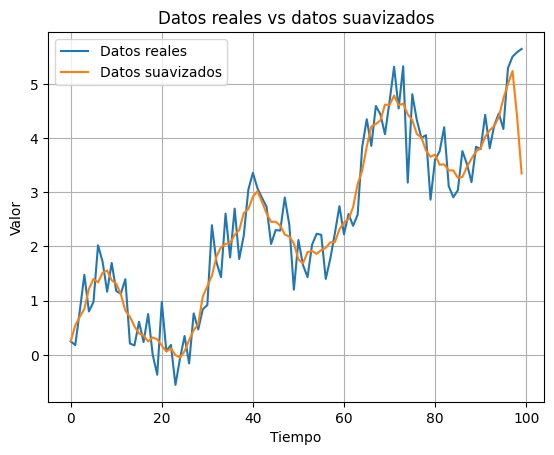

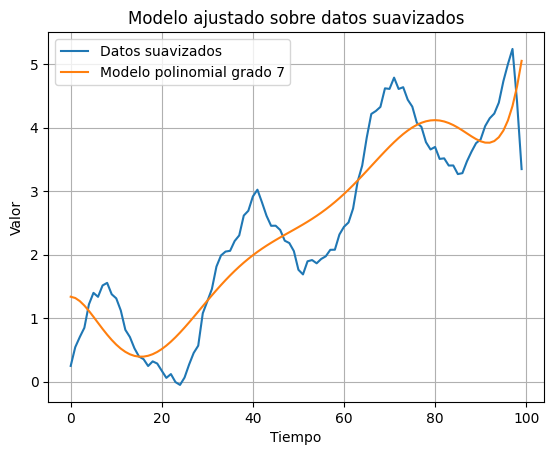

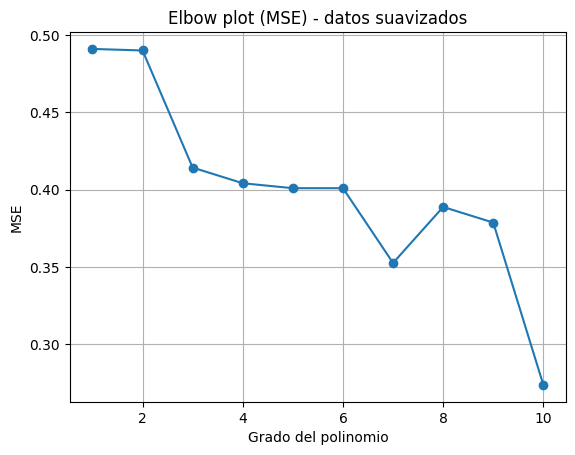

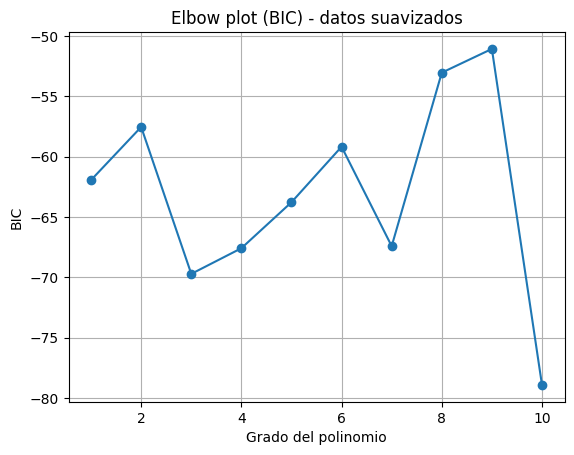

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# -------------------------------
# 1. Generar datos
# -------------------------------
np.random.seed(42)

n = 100
t = np.arange(n)
y_real = 0.05 * t + np.sin(t / 5) + np.random.normal(0, 0.5, n)

# -------------------------------
# 2. Suavizado (media móvil)
# -------------------------------
window = 5
y_suave = np.convolve(y_real, np.ones(window) / window, mode='same')

# -------------------------------
# 3. Tabla comparativa (NO se imprime)
# -------------------------------
df_comparativa = pd.DataFrame({
    "Tiempo": t,
    "Dato_real": y_real,
    "Dato_suavizado": y_suave
})

# -------------------------------
# 4. Gráfica: reales vs suavizados
# -------------------------------
plt.figure()
plt.plot(t, y_real, label="Datos reales")
plt.plot(t, y_suave, label="Datos suavizados")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Datos reales vs datos suavizados")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5. Modelado con datos suavizados
# -------------------------------
grados = range(1, 11)
mse_list = []
bic_list = []

for g in grados:
    poly = PolynomialFeatures(degree=g)
    X_poly = poly.fit_transform(t.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_suave)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y_suave, y_pred)
    mse_list.append(mse)

    k = g + 1
    bic = n * np.log(mse) + k * np.log(n)
    bic_list.append(bic)

# -------------------------------
# 6. Ajuste final del modelo
# -------------------------------
grado_elegido = 7

poly = PolynomialFeatures(degree=grado_elegido)
X_poly = poly.fit_transform(t.reshape(-1, 1))

model = LinearRegression()
model.fit(X_poly, y_suave)
y_fit = model.predict(X_poly)

plt.figure()
plt.plot(t, y_suave, label="Datos suavizados")
plt.plot(t, y_fit, label=f"Modelo polinomial grado {grado_elegido}")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Modelo ajustado sobre datos suavizados")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 7. Elbow plot (MSE)
# -------------------------------
plt.figure()
plt.plot(grados, mse_list, marker='o')
plt.xlabel("Grado del polinomio")
plt.ylabel("MSE")
plt.title("Elbow plot (MSE) - datos suavizados")
plt.grid(True)
plt.show()

# -------------------------------
# 8. Elbow plot (BIC)
# -------------------------------
plt.figure()
plt.plot(grados, bic_list, marker='o')
plt.xlabel("Grado del polinomio")
plt.ylabel("BIC")
plt.title("Elbow plot (BIC) - datos suavizados")
plt.grid(True)
plt.show()


1. cargar datos y visualkizarlo
2. si tiene mucho ruido, suavizarlo
3. revisar la estacionaridad
4. modelado (la funcion que mas se acerca a...)
5.

## datos aleatorios

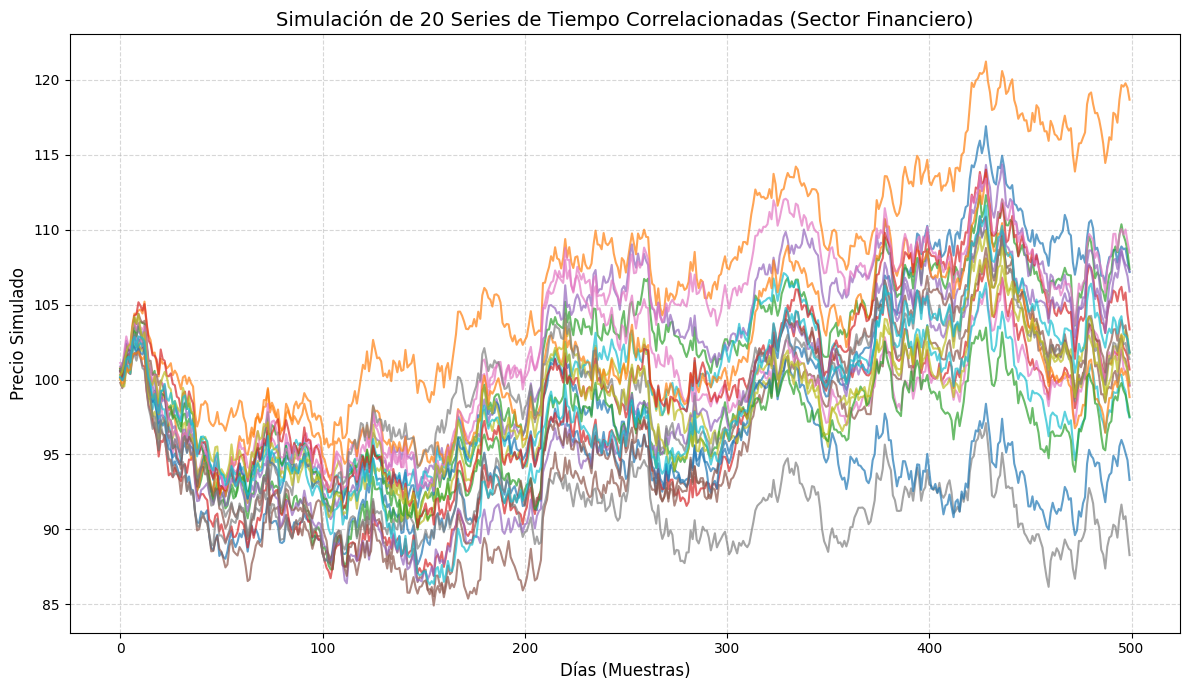

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de parámetros
n_series = 20
n_samples = 500
correlation_factor = 0.7  # Qué tanto siguen la tendencia principal (0 a 1)
seed = 42
np.random.seed(seed)

# 1. Generar la "Tendencia del Mercado" (el factor común)
market_trend = np.cumsum(np.random.normal(0, 1, n_samples))

# 2. Generar las 20 series basadas en la tendencia + ruido individual
data = {}
for i in range(n_series):
    # Ruido aleatorio único para cada serie
    individual_noise = np.random.normal(0, 1, n_samples)

    # Combinación lineal: (Factor * Mercado) + ((1 - Factor) * Ruido)
    # Esto asegura que todas las series tengan una base común pero identidad propia
    series = (correlation_factor * market_trend) + ((1 - correlation_factor) * np.cumsum(individual_noise))

    # Normalizamos para que empiecen en un valor similar (ej. 100 dólares)
    data[f'Activo_{i+1}'] = 100 + series

# Crear DataFrame
df = pd.DataFrame(data)

# 3. Graficar las series
plt.figure(figsize=(12, 7))
plt.plot(df, alpha=0.7)
plt.title(f'Simulación de {n_series} Series de Tiempo Correlacionadas (Sector Financiero)', fontsize=14)
plt.xlabel('Días (Muestras)', fontsize=12)
plt.ylabel('Precio Simulado', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


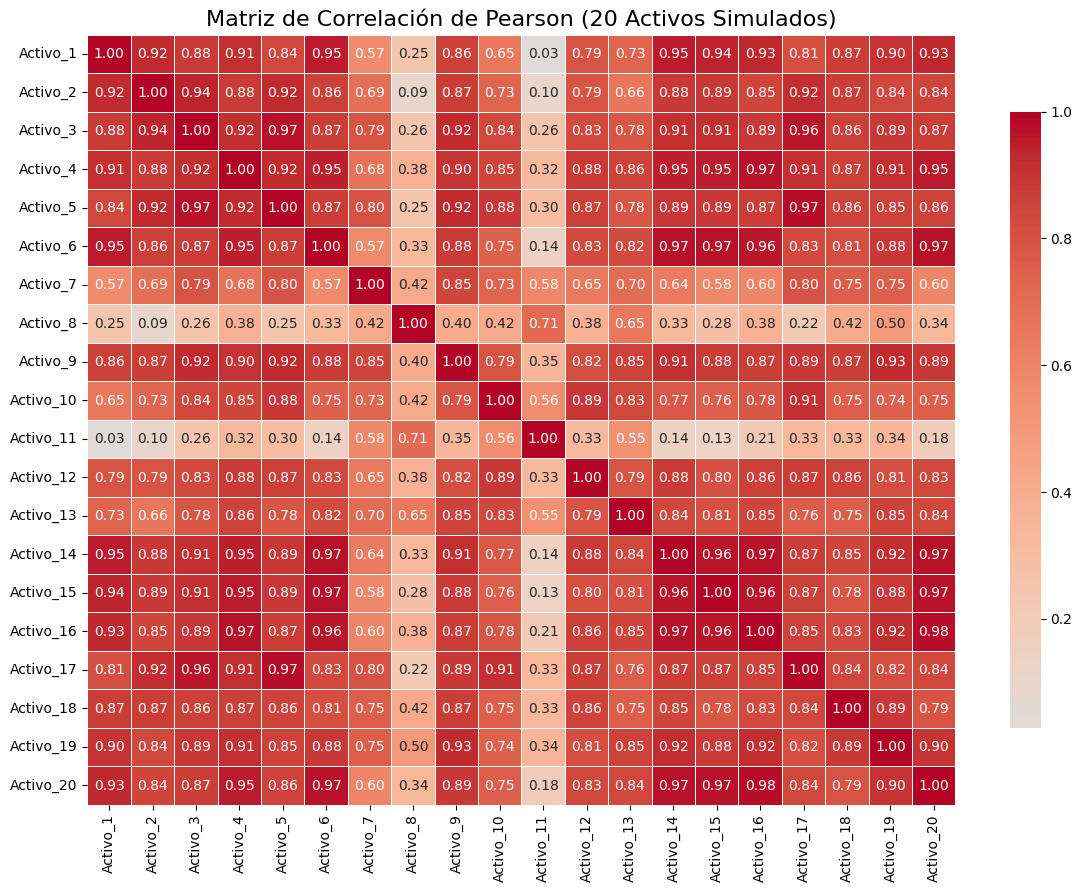

--- Resumen de la Correlación ---
Correlación promedio: 0.7473
Correlación máxima: 0.9772
Correlación mínima: 0.0281


In [ ]:
import seaborn as sns

# 1. Calcular la matriz de correlación de Pearson
matriz_corr = df.corr(method='pearson')

# 2. Configurar el gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación de Pearson (20 Activos Simulados)', fontsize=16)
plt.show()

# 3. Mostrar un resumen estadístico de las correlaciones
# Extraemos el triángulo superior para no contar la diagonal (que es siempre 1)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool), k=1)
correlaciones_valores = matriz_corr.where(mask).stack()

print("--- Resumen de la Correlación ---")
print(f"Correlación promedio: {correlaciones_valores.mean():.4f}")
print(f"Correlación máxima: {correlaciones_valores.max():.4f}")
print(f"Correlación mínima: {correlaciones_valores.min():.4f}")

#matriz de adyacencia

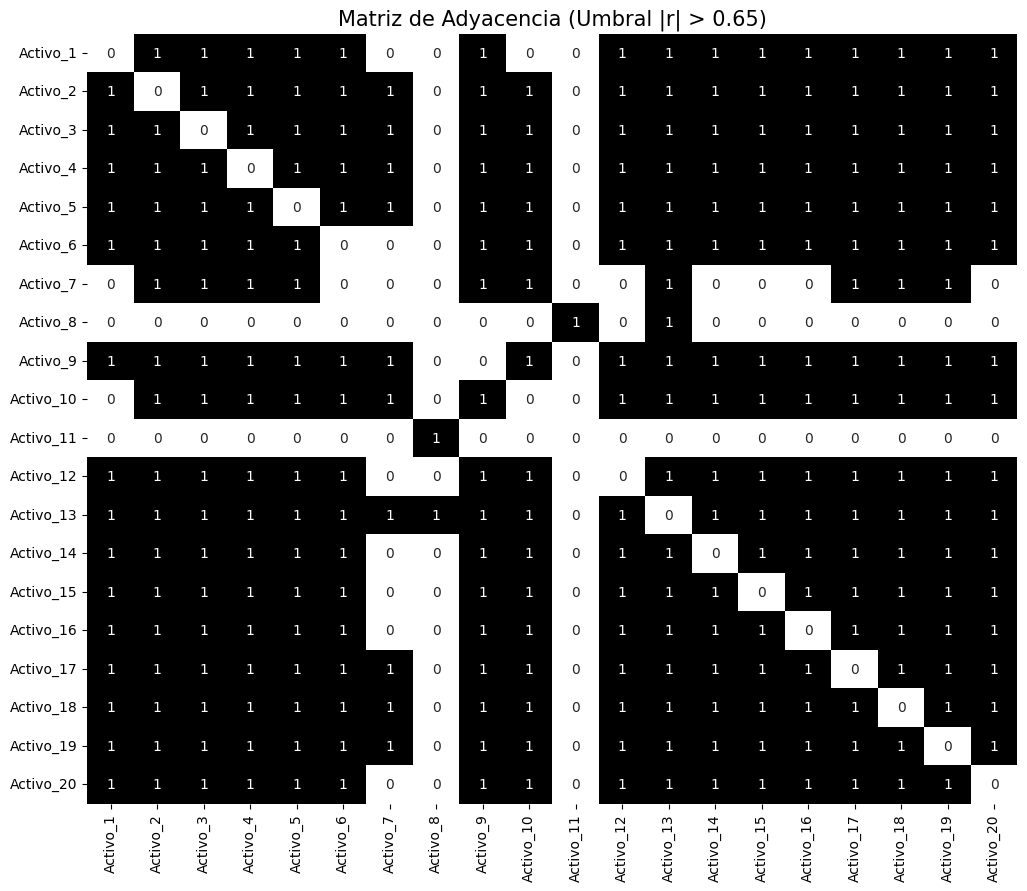

Total de conexiones (aristas) encontradas: 147


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular el valor absoluto de la matriz de correlación previa
matriz_abs = df.corr().abs()

# 2. Aplicar el umbral (Threshold > 0.65)
# Esto genera una matriz de booleanos (True/False)
umbral = 0.65
matriz_adyacencia_bool = matriz_abs > umbral

# 3. Convertir a enteros (1 para True, 0 para False)
# Nota: Generalmente se pone la diagonal en 0 para evitar "autobucles" en el grafo
matriz_adyacencia = matriz_adyacencia_bool.astype(int)
np.fill_diagonal(matriz_adyacencia.values, 0)

# 4. Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_adyacencia, annot=True, cmap="Greys", cbar=False)
plt.title(f'Matriz de Adyacencia (Umbral |r| > {umbral})', fontsize=15)
plt.show()

# Resumen de conexiones
num_conexiones = matriz_adyacencia.values.sum() // 2  # Dividido entre 2 por ser simétrica
print(f"Total de conexiones (aristas) encontradas: {num_conexiones}")

#Conexiòn

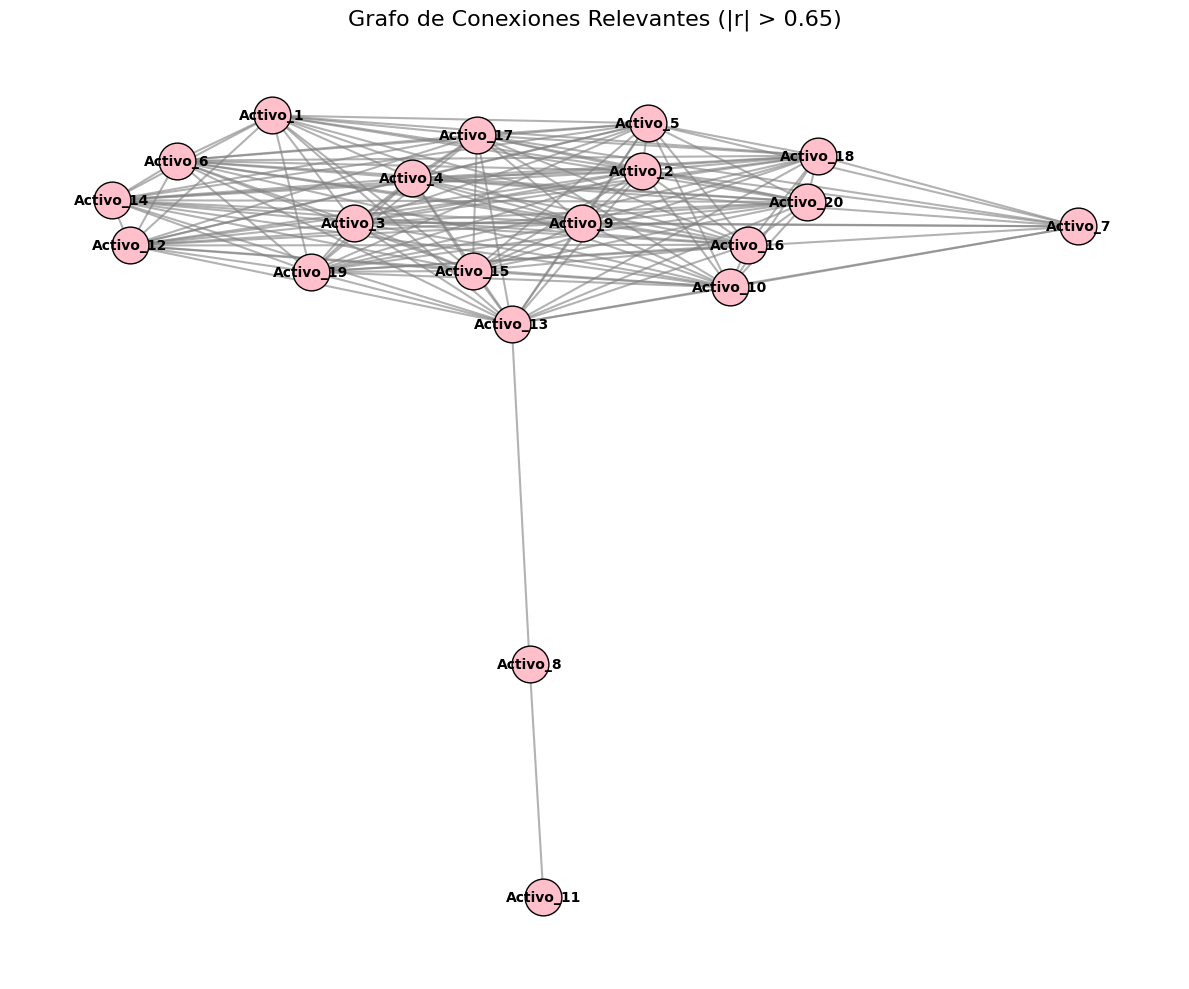

El nodo más conectado (influente) es: Activo_13


In [ ]:
import networkx as nx

# 1. Crear el objeto de Grafo a partir de la matriz de adyacencia
# Usamos el DataFrame 'matriz_adyacencia' del paso anterior
G = nx.from_pandas_adjacency(matriz_adyacencia)

# 2. Configurar el diseño (layout) para que los nodos se distribuyan bien
# 'spring_layout' simula fuerzas de atracción/repulsión
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.5)

# 3. Dibujar los elementos del grafo
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='pink', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')

# 4. Personalización final
plt.title(f"Grafo de Conexiones Relevantes (|r| > {umbral})", fontsize=16)
plt.axis('off') # Ocultar los ejes de coordenadas
plt.tight_layout()
plt.show()

# 5. Bonus: ¿Quién es el más influyente?
centralidad = nx.degree_centrality(G)
lider = max(centralidad, key=centralidad.get)
print(f"El nodo más conectado (influente) es: {lider}")

#PASO 5

In [ ]:
import networkx as nx
import pandas as pd

# 1. MEDIDAS DE CENTRALIDAD (¿Quiénes son los protagonistas?)
# Grado: cuántas conexiones directas tiene
degree_cent = nx.degree_centrality(G)
# Interintermediación (Betweenness): nodos que actúan como puentes entre grupos
between_cent = nx.betweenness_centrality(G)
# Cercanía (Closeness): qué tan rápido llega un nodo al resto
close_cent = nx.closeness_centrality(G)

# 2. COMPONENTES Y DIÁMETRO
# Identificar islas (componentes conectados)
componentes = list(nx.connected_components(G))
num_componentes = len(componentes)
gigante = G.subgraph(max(componentes, key=len)) # Componente más grande

# Diámetro: la distancia más larga entre dos nodos (en el componente gigante)
diametro = nx.diameter(gigante)

# 3. INTEGRACIÓN Y SEGREGACIÓN
densidad = nx.density(G)
coef_agrupamiento_global = nx.average_clustering(G)
# Camino más corto promedio (en el componente gigante)
avg_short_path = nx.average_shortest_path_length(gigante)

# --- RESULTADOS ---
print(f"--- Topología del Grafo ---")
print(f"Densidad: {densidad:.4f}")
print(f"Número de componentes: {num_componentes}")
print(f"Diámetro (del componente principal): {diametro}")
print(f"Coeficiente de Agrupamiento Medio: {coef_agrupamiento_global:.4f}")
print(f"Longitud de camino más corto promedio: {avg_short_path:.4f}")

# Tabla de centralidades para los primeros 5 nodos
df_cent = pd.DataFrame({
    'Grado': degree_cent,
    'Intermediación': between_cent,
    'Cercanía': close_cent
}).head(5)
print("\n--- Centralidades (Primeros 5 nodos) ---")
print(df_cent)

--- Topología del Grafo ---
Densidad: 0.7737
Número de componentes: 1
Diámetro (del componente principal): 3
Coeficiente de Agrupamiento Medio: 0.8633
Longitud de camino más corto promedio: 1.3158

--- Centralidades (Primeros 5 nodos) ---
             Grado  Intermediación  Cercanía
Activo_1  0.789474        0.000000  0.791667
Activo_2  0.894737        0.004548  0.863636
Activo_3  0.894737        0.004548  0.863636
Activo_4  0.894737        0.004548  0.863636
Activo_5  0.894737        0.004548  0.863636


# Informe de Análisis de Redes: Conectómica de Series de Tiempo

## 1. Métricas Globales de Topología
| Métrica | Valor Obtenido | Rango de Referencia | Interpretación |
| :--- | :---: | :---: | :--- |
| **Densidad** | **0.7737** | 0.15 — 0.40 | **Sincronización Masiva:** Red casi completa. El fenómeno es altamente homogéneo. |
| **Componentes Conectados** | **1** | 1 — 3 | **Integración Total:** Todos los nodos están interconectados; no hay sub-sistemas aislados. |
| **Diámetro** | **3** | 2 — 6 | **Red Compacta:** La distancia máxima entre los nodos más alejados es muy corta. |
| **Coef. Agrupamiento Medio** | **0.8633** | 0.30 — 0.60 | **Alta Segregación Local:** Los nodos forman vecindarios densos y redundantes. |
| **Longitud de Camino Medio** | **1.3158** | 1.5 — 3.5 | **Eficiencia Extrema:** La información se propaga en apenas ~1.3 saltos promedio. |



## 2. Centralidad de Nodos (Top 5)
| Activo | Grado (Degree) | Intermediación | Cercanía | Diagnóstico de Rol |
| :--- | :---: | :---: | :---: | :--- |
| **Activo_1** | 0.7895 | 0.0000 | 0.7917 | **Seguidor:** Muy conectado, pero con nulo control como puente. |
| **Activo_2** | 0.8947 | 0.0045 | 0.8636 | **Hub / Líder:** Nodo central con máxima influencia sistémica. |
| **Activo_3** | 0.8947 | 0.0045 | 0.8636 | **Hub / Líder:** Actúa como referencia para el sistema. |
| **Activo_4** | 0.8947 | 0.0045 | 0.8636 | **Hub / Líder:** Alta redundancia con otros nodos centrales. |
| **Activo_5** | 0.8947 | 0.0045 | 0.8636 | **Hub / Líder:** Crucial para la estabilidad de la tendencia. |



## 3. Interpretación de Resultados
* **Estructura:** La red se comporta como una **"clique" casi completa**. Al tener una densidad tan alta (0.77), la individualidad de las series se pierde en favor de un comportamiento colectivo.
* **Flujo de Información:** La **Intermediación cercana a cero** indica que no hay cuellos de botella. Si un nodo desaparece, la red no se ve afectada porque existen múltiples caminos alternativos.
* **Vulnerabilidad:** Existe un **Riesgo Sistémico** elevado. Cualquier perturbación en los líderes (Activos 2-5) impactará al resto de la red casi instantáneamente.

Análisis de Centralidades (Nodos Críticos)

Aquí analizamos cómo se comportan los "protagonistas" de tus series de tiempo:

Grado (Influencia Directa): Los Activos 2 al 5 tienen un valor de 0.89. Esto significa que están conectados directamente con casi el 90% de toda la red. Son los nodos "referencia" que marcan la tendencia del mercado.

Intermediación (Control del flujo): Tus valores son extremadamente bajos (0.0045).

¿Por qué? En redes tan densas, no se necesitan "puentes" o intermediarios porque casi todos están conectados con todos. No hay cuellos de botella; el sistema es redundante.

Cercanía (Velocidad de respuesta): Con valores de 0.86, estos nodos están en el "centro" del mundo. Pueden percibir cualquier cambio en el sistema mucho antes que los nodos periféricos.

         X0        X1        X2        X3        X4        X5        X6  \
0  0.496714  0.576265 -0.336202  0.109533  0.556768  1.145092  0.978686   
1  0.358450  0.567152  0.154034 -0.337855 -0.528307  0.039672 -0.182966   
2  1.006138  1.346436  1.079771  1.298620  1.086956  0.899380  0.780653   
3  2.529168  2.550236  2.063679  2.328762  1.631872  0.982029  1.057272   
4  2.295015  1.147177  0.692709  0.760885  0.391460  0.662279  0.554254   

         X7        X8        X9  
0  0.259493  0.116146  1.043513  
1  0.121954  0.785001  0.597671  
2  1.217374  0.650917  0.166531  
3  1.205295  0.564640 -0.305146  
4  0.941427  0.511770 -0.492154  


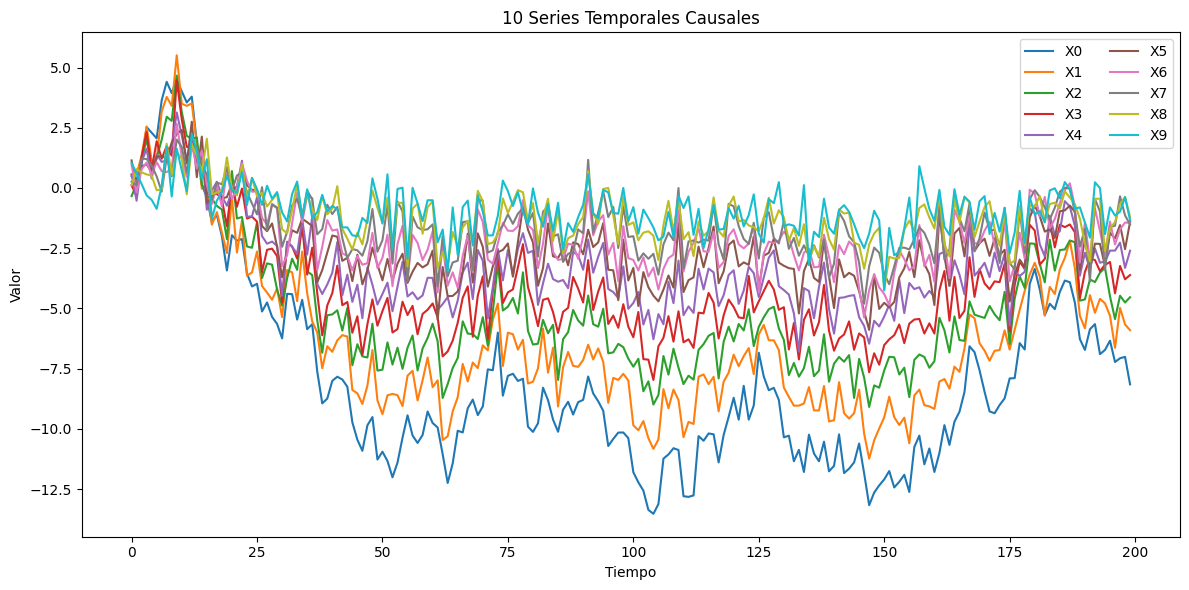

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Semilla para reproducibilidad
np.random.seed(42)

# Parámetros
n_series = 10      # número de series causales
n_steps = 200      # longitud temporal
noise_scale = 0.5  # ruido

# Contenedor de las series
data = np.zeros((n_steps, n_series))

# Serie raíz (causa inicial)
data[:, 0] = np.cumsum(np.random.normal(0, 1, n_steps))

# Generar cadenas causales
for i in range(1, n_series):
    data[:, i] = (
        0.8 * data[:, i - 1] +               # efecto causal
        np.random.normal(0, noise_scale, n_steps)
    )

# Convertir a DataFrame
columns = [f"X{i}" for i in range(n_series)]
df = pd.DataFrame(data, columns=columns)

# Mostrar primeras filas
print(df.head())

# Graficar
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], label=col)

plt.title("10 Series Temporales Causales")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


#Causalidad de Granger

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests


In [ ]:
def granger_weights(df, max_lag=3):
    n = df.shape[1]
    variables = df.columns
    W = pd.DataFrame(
        np.zeros((n, n)),
        columns=variables,
        index=variables
    )

    for cause in variables:
        for effect in variables:
            if cause == effect:
                continue

            test_result = grangercausalitytests(
                df[[effect, cause]],
                maxlag=max_lag,
                verbose=False
            )

            # Tomamos el mejor p-value (mínimo) entre los lags
            p_values = [
                test_result[lag][0]['ssr_ftest'][1]
                for lag in range(1, max_lag + 1)
            ]

            min_p = np.min(p_values)

            # Convertimos a peso causal
            W.loc[cause, effect] = 1 - min_p

    return W


In [ ]:
W = granger_weights(df, max_lag=3)

print("Matriz de pesos causales (Granger):")
print(W.round(3))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Matriz de pesos causales (Granger):
       X0     X1     X2     X3     X4     X5     X6     X7     X8     X9
X0  0.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
X1  0.702  0.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
X2  0.545  0.701  0.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
X3  0.925  0.817  0.933  0.000  1.000  1.000  1.000  1.000  1.000  1.000
X4  0.820  0.909  0.991  0.748  0.000  1.000  1.000  1.000  1.000  1.000
X5  0.585  0.686  0.933  0.663  0.359  0.000  1.000  1.000  1.000  1.000
X6  0.527  0.336  0.945  0.914  0.707  0.953  0.000  0.998  1.000  1.000
X7  0.508  0.218  0.516  0.332  0.200  0.817  0.415  0.000  1.000  1.000
X8  0.827  0.788  0.532  0.322  0.239  0.478  0.260  0.455  0.000  0.999
X9  0.549  0.828  0.529  0.581  0.698  0.738  0.648  0.450  0.702  0.000


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

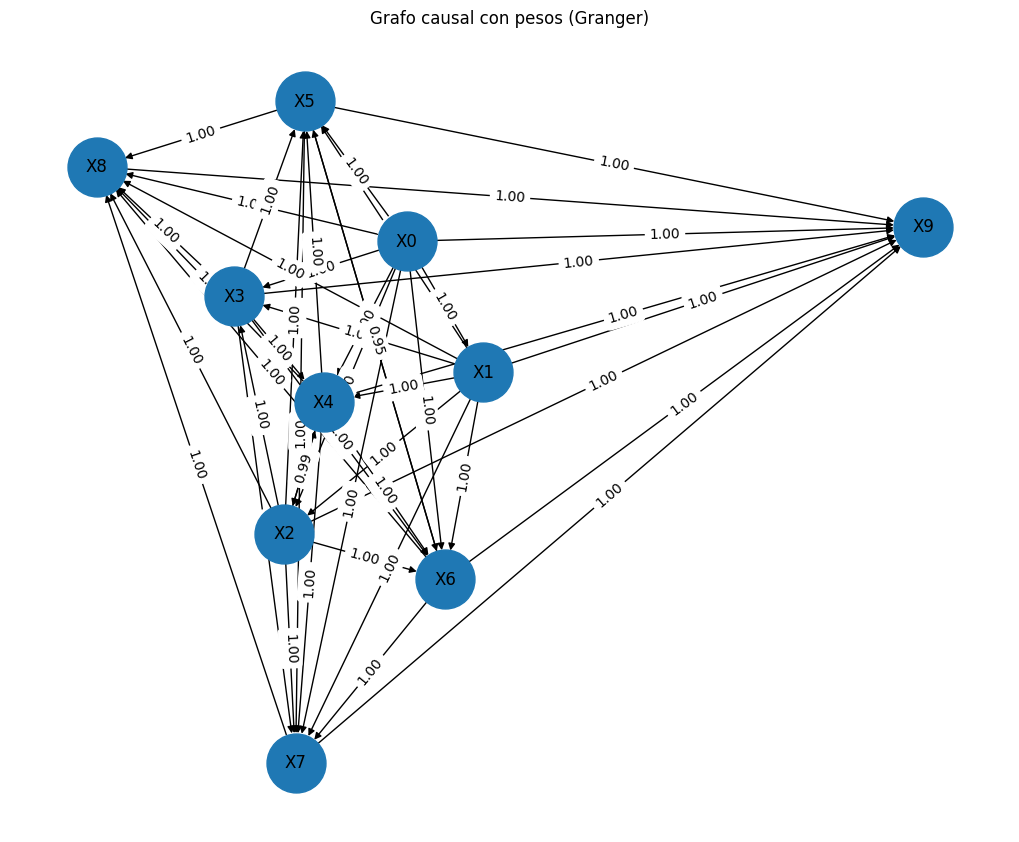

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido
G = nx.DiGraph()
G.add_nodes_from(W_sig.index)

for cause in W_sig.index:
    for effect in W_sig.columns:
        w = W_sig.loc[cause, effect]
        if w > 0:
            G.add_edge(cause, effect, weight=w)

# Posiciones
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos y aristas
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1800,
    arrows=True
)

# Etiquetas de pesos
edge_labels = {
    (u, v): f"{d['weight']:.2f}"
    for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo causal con pesos (Granger)")
plt.show()
